[Data exploration](#data_exploration)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
sns.set(style='white', context='notebook', palette='deep')

In [6]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
print("training samples:", len(train))
print("test samples:", len(test))
train.head(n=1)

training samples: 891
test samples: 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


<a id="data_exploration"></a>
### Data exploration

In [7]:
class DataSet:
    def __init__(self, **sets):
        ordered = list(sets.items())
        count = 0
        self._bounds = {}
        for (name, df) in ordered:
            self._bounds[name] = (count, count + len(df))
            count += len(df)
        self.total = pd.concat([df for (_, df) in ordered], axis=0).reset_index(drop=True)  
        
    def __getattr__(self, name):
        if name not in self._bounds:
            raise NameError("{} not a valid attribute or dataset".format(name))
        (lo, hi) = self._bounds[name]
        return self.total[lo:hi] 

In [8]:
ds = DataSet(train=train, test=test)

In [9]:
print(ds.total.dtypes)
print(ds.train.isnull().sum())
print(ds.test.isnull().sum())

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object
Age            177
Cabin          687
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64
Age             86
Cabin          327
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64


In [92]:
ds.total.PassengerId = ds.total.PassengerId.astype(object)
ds.total.Pclass = ds.total.Pclass.astype(object)
print(ds.total.dtypes)
ds.train.describe()

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId     object
Pclass          object
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object


,Age,Fare,Parch,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,0.523008,0.383838
std,14.526497,49.693429,0.806057,1.102743,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,8.000000,1.000000


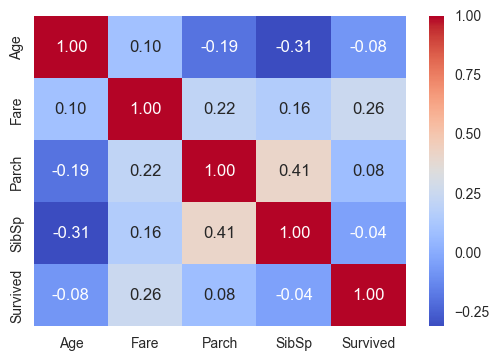

In [88]:
sns.heatmap(ds.train[["Age", "Fare", "Parch", "SibSp", "Survived"]].corr(),
            annot=True, fmt='.2f', cmap='coolwarm')

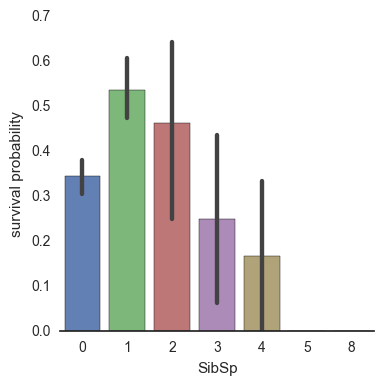

In [107]:
g = sns.factorplot(x='SibSp', y='Survived', data=ds.train, kind='bar', palette='muted', saturation=.6)
g.despine(left=True).set_ylabels('survival probability');

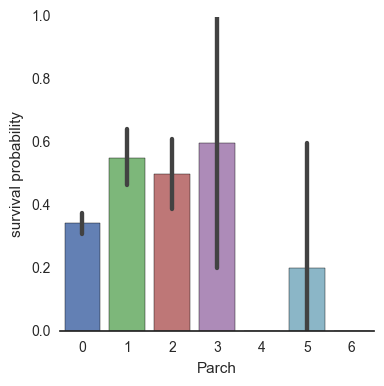

In [106]:
g = sns.factorplot(x='Parch', y='Survived', data=ds.train, kind='bar', palette='muted', saturation=.6)
g.despine(left=True).set_ylabels('survival probability');

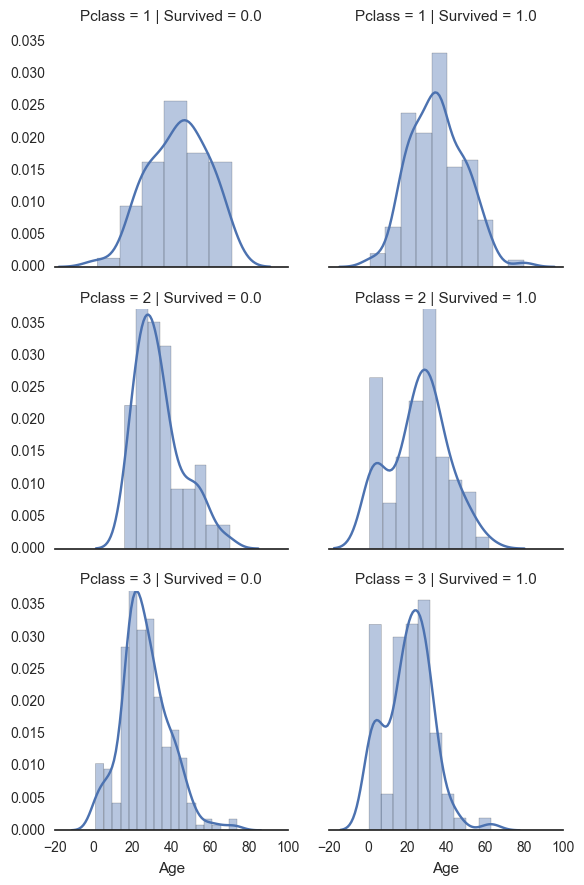

In [131]:
sns.FacetGrid(ds.train, col='Survived', row='Pclass').map(sns.distplot, 'Age').despine(left=True);

80.0


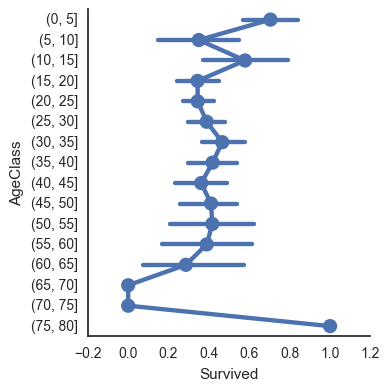

In [77]:
print(ds.train.Age.max())
ds.total['AgeClass'] = pd.cut(ds.total.Age, bins=range(0, 81, 5))
sns.factorplot(y='AgeClass', x='Survived', data=ds.train)

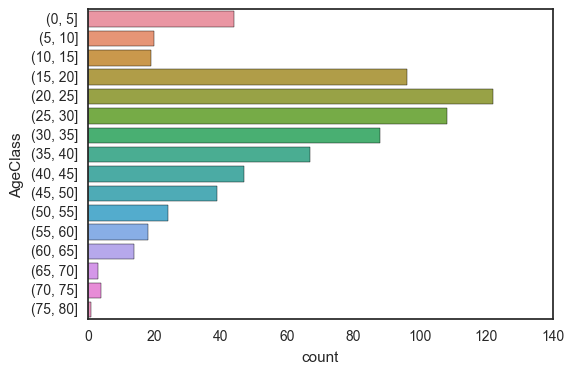

In [75]:
sns.countplot(y='AgeClass', data=ds.train)

512.3292


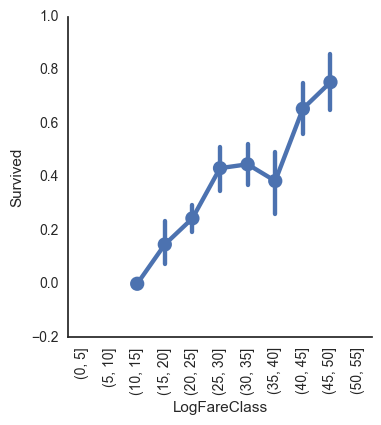

In [193]:
print(ds.train.Fare.max())
ds.total['LogFare'] = ds.total.Fare.map(lambda x: np.log(x) if x > 0 else 0)
ds.total['LogFareCapped'] = ds.total.LogFare.map(lambda x: 10 * min(x, 5))
ds.total['FareClass'] = pd.cut(ds.total.Fare, bins=list(range(0, 80, 10)) + list(range(80, 520, 20)))
ds.total['LogFareClass'] = pd.cut(ds.total.LogFareCapped, bins=range(0, 60, 5))
sns.factorplot(x='LogFareClass', y='Survived', data=ds.train).set_xticklabels(rotation=90);

In [205]:
ds.train[['Survived', 'LogFareClass', 'Pclass']].groupby(['LogFareClass', 'Pclass']).agg(['mean', 'count'])

Survived      
                         mean count
LogFareClass Pclass                
(10, 15]     3       0.000000     1
(15, 20]     1       0.000000     1
             3       0.149254    67
(20, 25]     2       0.344828    29
             3       0.233716   261
(25, 30]     2       0.463768    69
             3       0.402778    72
(30, 35]     1       0.519231    52
             2       0.580645    62
             3       0.232143    56
(35, 40]     1       0.473684    38
             2       0.636364    11
             3       0.000000    16
(40, 45]     1       0.761905    63
             2       0.285714     7
             3       0.357143    14
(45, 50]     1       0.754386    57

In [167]:
ds.train[['Survived', 'LogFare', 'Fare', 'LogFareCapped']].corr()

,Survived,LogFare,Fare,LogFareCapped
Survived,1.000000,0.331805,0.257307,0.332628
LogFare,0.331805,1.000000,0.786136,0.995770
Fare,0.257307,0.786136,1.000000,0.731805
LogFareCapped,0.332628,0.995770,0.731805,1.000000


In [171]:
ds.train[['Fare', 'Pclass']].groupby('Pclass').describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

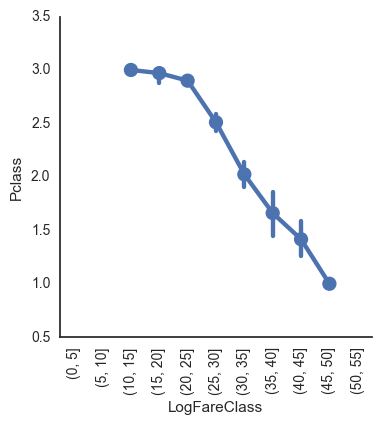

In [195]:
sns.factorplot(y='Pclass', x='LogFareClass', data=ds.train).set_xticklabels(rotation=90);

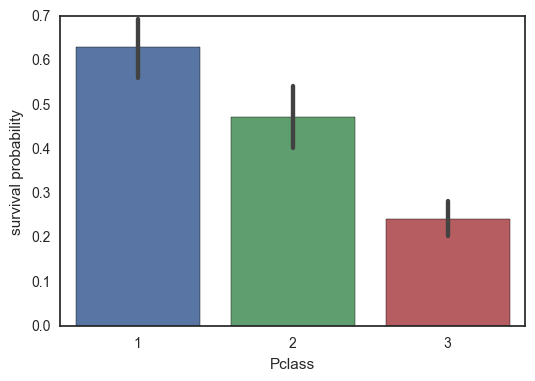

In [176]:
sns.barplot(x='Pclass', y='Survived', data=ds.train).set_ylabel('survival probability');

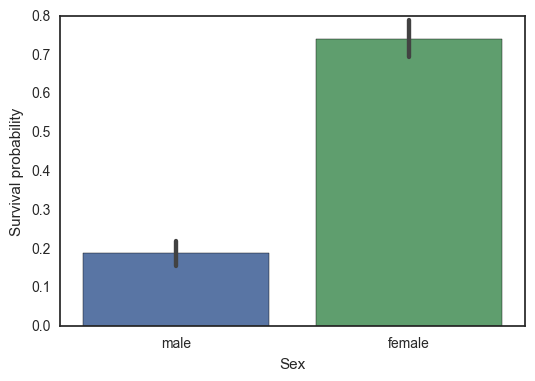

In [10]:
sns.barplot(x='Sex', y='Survived', data=ds.train).set_ylabel('Survival probability');

In [12]:
ds.train[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

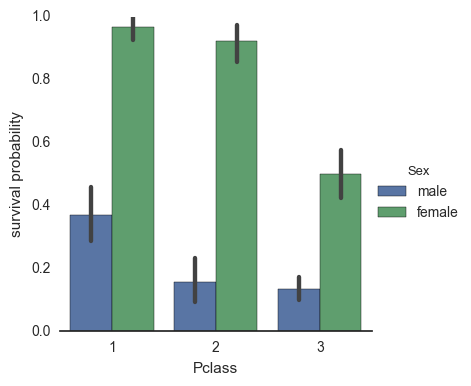

In [15]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=ds.train, kind='bar')
g.despine(left=True).set_ylabels('survival probability');

In [38]:
from scipy.stats import chi2_contingency
c = ds.train.groupby(['Sex', 'Pclass']).size().unstack(fill_value=0)

print(chi2_contingency(c.values))

c

(16.971499095517114, 0.00020638864348233114, 2, array([[  76.12121212,   64.84399551,  173.03479237],
       [ 139.87878788,  119.15600449,  317.96520763]]))


Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [42]:
ds.total[ds.total.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


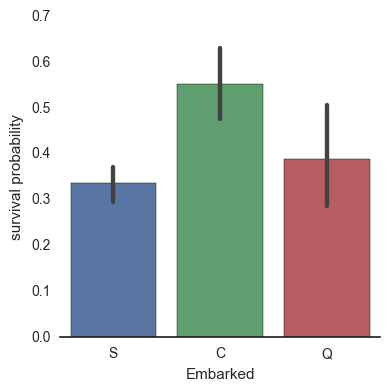

In [46]:
g = sns.factorplot(x='Embarked', y='Survived', data=ds.train, kind='bar')
g.despine(left=True).set_ylabels('survival probability');

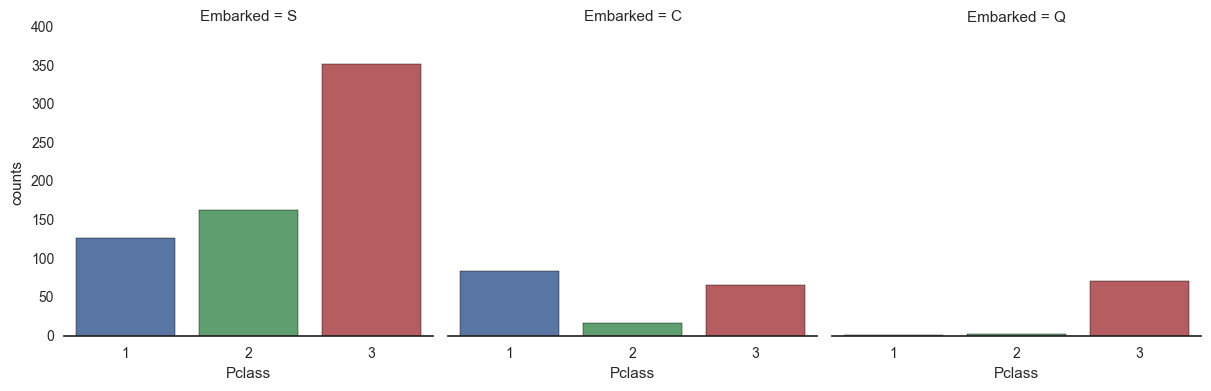

In [52]:
g = sns.factorplot(x='Pclass', col='Embarked', data=ds.train, kind='count')
g.despine(left=True).set_ylabels('counts');

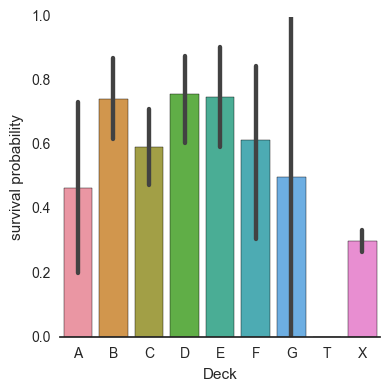

In [93]:
ds.total.Cabin = ds.total.Cabin.fillna('X')
ds.total['Deck'] = ds.total.Cabin.map(lambda x: x[0])
decks = ds.total.Deck.unique(); decks.sort()
g = sns.factorplot(x='Deck', y='Survived', data=ds.train, kind='bar', order=decks)
g.despine(left=True).set_ylabels('survival probability');

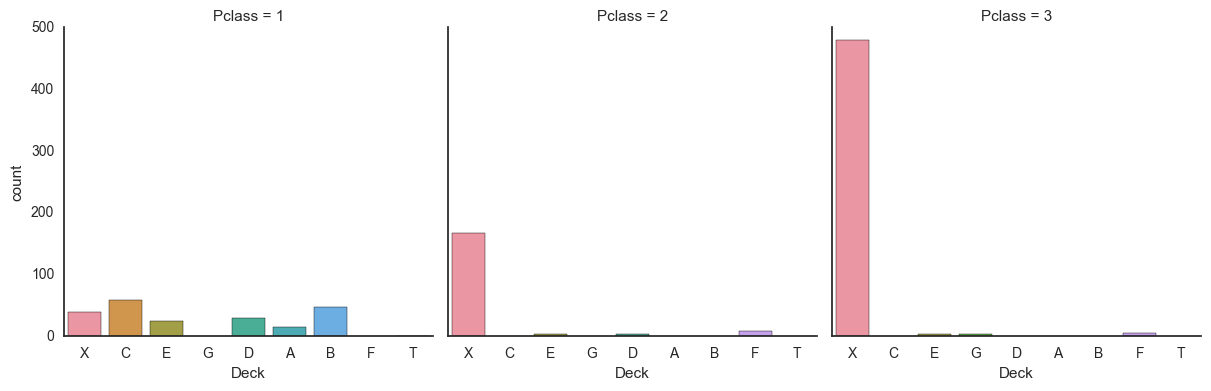

In [98]:
sns.factorplot(x='Deck', col='Pclass', data=ds.train, kind='count');

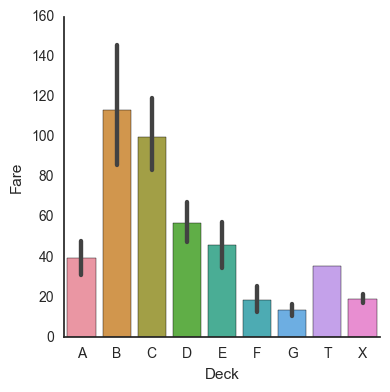

In [101]:
sns.factorplot(x='Deck', y='Fare', data=ds.train, kind='bar', order=decks);